Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_ag_econ = pd.read_csv('AgentesEconomicosRegulares.csv', encoding='latin1', sep=';')
df_ag_econ = df_ag_econ[['REGISTRO_ANCINE',	'DATA_REGISTRO', 'RAZAO_SOCIAL', 'MUNICIPIO', 'CD_MUNICIPIO_IBGE', 'UF', 'CLASSIFICACAO_AGENTE_ECONOMICO']]
df_ag_econ

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,MUNICIPIO,CD_MUNICIPIO_IBGE,UF,CLASSIFICACAO_AGENTE_ECONOMICO
0,3132,01/02/2005,CINEMAS ALVORADA DIVERSÕES LTDA,RIBEIRÃO PRETO,3543402.0,SP,Brasileiro de capital nacional nos termos do a...
1,5387,01/02/2006,SANDRA HELENA SILVINO PARENTE - ME,FORTALEZA,2304400.0,CE,Brasileiro independente
2,11893,01/02/2007,CAVIDEO PRODUCOES COMERCIO E LOCACAO DE FILMES...,RIO DE JANEIRO,3304557.0,RJ,Brasileiro independente
3,18260,01/02/2011,COMERCIAL TALKING LTDA-ME,BARRETOS,3505500.0,SP,Brasileiro independente
4,18261,01/02/2011,CENAUM PRODUÇÕES LTDA.,PORTO ALEGRE,4314902.0,RS,Brasileiro independente
...,...,...,...,...,...,...,...
14796,52264,31/10/2022,SISTEMA O NORTE DE COMUNICAÇÃO LTDA,ARAGUAÍNA,1702109.0,TO,Brasileiro de capital nacional nos termos do a...
14797,52263,31/10/2022,DARLY INACIO ALVES JUNIOR ALUGUEL,PORTO ALEGRE,4314902.0,RS,Brasileiro independente
14798,52266,31/10/2022,FREYA PRODUÇÕES AUDIOVISUAIS EIRELI,SÃO PAULO,3550308.0,SP,Brasileiro independente
14799,28605,31/12/2014,NUKEARTS SERVIÇOS GRAFICOS LTDA - ME,JOINVILLE,4209102.0,SC,Brasileiro independente


In [3]:
df_ag_econ['DATA_REGISTRO'] = df_ag_econ['DATA_REGISTRO'].str.strip()
df_ag_econ['DATA_REGISTRO'] = pd.to_datetime(df_ag_econ['DATA_REGISTRO'], format='%d/%m/%Y', dayfirst=True)
df_ag_econ

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,MUNICIPIO,CD_MUNICIPIO_IBGE,UF,CLASSIFICACAO_AGENTE_ECONOMICO
0,3132,2005-02-01,CINEMAS ALVORADA DIVERSÕES LTDA,RIBEIRÃO PRETO,3543402.0,SP,Brasileiro de capital nacional nos termos do a...
1,5387,2006-02-01,SANDRA HELENA SILVINO PARENTE - ME,FORTALEZA,2304400.0,CE,Brasileiro independente
2,11893,2007-02-01,CAVIDEO PRODUCOES COMERCIO E LOCACAO DE FILMES...,RIO DE JANEIRO,3304557.0,RJ,Brasileiro independente
3,18260,2011-02-01,COMERCIAL TALKING LTDA-ME,BARRETOS,3505500.0,SP,Brasileiro independente
4,18261,2011-02-01,CENAUM PRODUÇÕES LTDA.,PORTO ALEGRE,4314902.0,RS,Brasileiro independente
...,...,...,...,...,...,...,...
14796,52264,2022-10-31,SISTEMA O NORTE DE COMUNICAÇÃO LTDA,ARAGUAÍNA,1702109.0,TO,Brasileiro de capital nacional nos termos do a...
14797,52263,2022-10-31,DARLY INACIO ALVES JUNIOR ALUGUEL,PORTO ALEGRE,4314902.0,RS,Brasileiro independente
14798,52266,2022-10-31,FREYA PRODUÇÕES AUDIOVISUAIS EIRELI,SÃO PAULO,3550308.0,SP,Brasileiro independente
14799,28605,2014-12-31,NUKEARTS SERVIÇOS GRAFICOS LTDA - ME,JOINVILLE,4209102.0,SC,Brasileiro independente


In [4]:
df_ag_econ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14801 entries, 0 to 14800
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   REGISTRO_ANCINE                 14801 non-null  int64         
 1   DATA_REGISTRO                   14801 non-null  datetime64[ns]
 2   RAZAO_SOCIAL                    14801 non-null  object        
 3   MUNICIPIO                       14801 non-null  object        
 4   CD_MUNICIPIO_IBGE               14792 non-null  float64       
 5   UF                              14801 non-null  object        
 6   CLASSIFICACAO_AGENTE_ECONOMICO  14801 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 809.6+ KB


In [5]:
df_ag_econ['CD_MUNICIPIO_IBGE'].isnull().value_counts()

CD_MUNICIPIO_IBGE
False    14792
True         9
Name: count, dtype: int64

In [6]:
null_values = []
default_value = 3550308.0

for index, row in df_ag_econ.iterrows():
    if pd.isnull(row['CD_MUNICIPIO_IBGE']):
        row['CD_MUNICIPIO_IBGE'] = default_value
        null_values.append(index)

df_ag_econ['CD_MUNICIPIO_IBGE'].fillna(default_value, inplace=True)

In [7]:
df_ag_econ

,REGISTRO_ANCINE,DATA_REGISTRO,RAZAO_SOCIAL,MUNICIPIO,CD_MUNICIPIO_IBGE,UF,CLASSIFICACAO_AGENTE_ECONOMICO
0,3132,2005-02-01,CINEMAS ALVORADA DIVERSÕES LTDA,RIBEIRÃO PRETO,3543402.0,SP,Brasileiro de capital nacional nos termos do a...
1,5387,2006-02-01,SANDRA HELENA SILVINO PARENTE - ME,FORTALEZA,2304400.0,CE,Brasileiro independente
2,11893,2007-02-01,CAVIDEO PRODUCOES COMERCIO E LOCACAO DE FILMES...,RIO DE JANEIRO,3304557.0,RJ,Brasileiro independente
3,18260,2011-02-01,COMERCIAL TALKING LTDA-ME,BARRETOS,3505500.0,SP,Brasileiro independente
4,18261,2011-02-01,CENAUM PRODUÇÕES LTDA.,PORTO ALEGRE,4314902.0,RS,Brasileiro independente
...,...,...,...,...,...,...,...
14796,52264,2022-10-31,SISTEMA O NORTE DE COMUNICAÇÃO LTDA,ARAGUAÍNA,1702109.0,TO,Brasileiro de capital nacional nos termos do a...
14797,52263,2022-10-31,DARLY INACIO ALVES JUNIOR ALUGUEL,PORTO ALEGRE,4314902.0,RS,Brasileiro independente
14798,52266,2022-10-31,FREYA PRODUÇÕES AUDIOVISUAIS EIRELI,SÃO PAULO,3550308.0,SP,Brasileiro independente
14799,28605,2014-12-31,NUKEARTS SERVIÇOS GRAFICOS LTDA - ME,JOINVILLE,4209102.0,SC,Brasileiro independente


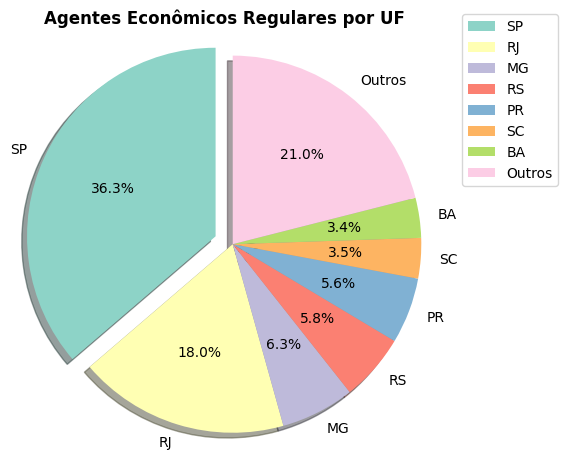

In [8]:
import matplotlib.pyplot as plt


uf_counts = {
    'SP': 5371,
    'RJ': 2671,
    'MG': 935,
    'RS': 854,
    'PR': 836,
    'SC': 513,
    'BA': 507,
    'Outros': 3114,
}

ufs = list(uf_counts.keys())
counts = list(uf_counts.values())


fig, ax = plt.subplots(figsize=(5.5,5.5))
colors = plt.cm.Set3(range(len(ufs))) 
explode = [0.1 if uf == 'SP' else 0 for uf in ufs]  

ax.pie(counts, labels=ufs, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)
legend_labels = [f'{uf}: {count}' for uf, count in zip(ufs, counts)]
ax.legend(ufs, loc='upper right', bbox_to_anchor=(1.3, 1.05))
ax.set_title("Agentes Econômicos Regulares por UF", fontweight='bold', y=0.99)
ax.axis('equal')
plt.show()


In [10]:
df_ag_econ['ANO'] = df_ag_econ['DATA_REGISTRO'].dt.year
df_ag_econ['ANO'].value_counts()


ANO
2021    1837
2018    1742
2022    1649
2019    1622
2020    1603
2013     624
2015     586
2014     584
2023     457
2016     453
2012     399
2011     389
2017     379
2005     370
2010     367
2003     289
2004     286
2008     286
2009     281
2006     211
2002     196
2007     191
Name: count, dtype: int64

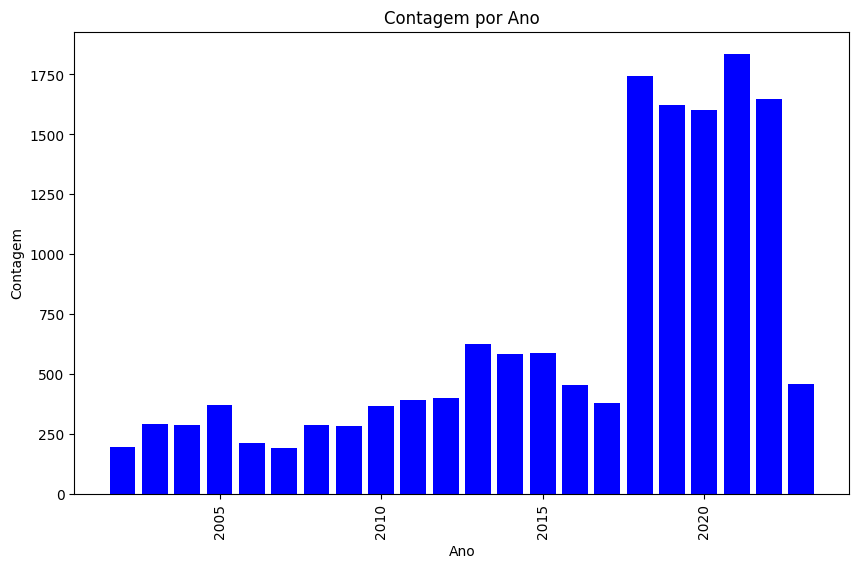

In [11]:
import matplotlib.pyplot as plt

# Dados
ano_counts = {
    2021: 1837,
    2018: 1742,
    2022: 1649,
    2019: 1622,
    2020: 1603,
    2013: 624,
    2015: 586,
    2014: 584,
    2023: 457,
    2016: 453,
    2012: 399,
    2011: 389,
    2017: 379,
    2005: 370,
    2010: 367,
    2003: 289,
    2004: 286,
    2008: 286,
    2009: 281,
    2006: 211,
    2002: 196,
    2007: 191
}

# Preparar os dados para o gráfico
anos = list(ano_counts.keys())
counts = list(ano_counts.values())

# Configurar o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(anos, counts, color='blue')

# Adicionar rótulos nos eixos x e y
ax.set_xlabel('Ano')
ax.set_ylabel('Contagem')

# Adicionar título
ax.set_title('Contagem por Ano')

# Girar os rótulos do eixo x em 90 graus para melhor visualização
plt.xticks(rotation=90)

# Exibir o gráfico
plt.show()
